<a href="https://colab.research.google.com/github/kahramankaya/python-project-1/blob/main/04_mnist_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()



#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')


In [44]:
#path="/content/Data.zip"
#dest=download_url(URLs.MNIST_SAMPLE,path)  Gokay hocaya untar_data ıle download_url arasında kı farkı sor arastırdım ama tam anlamıyla anlamadım.

path=untar_data(URLs.MNIST_SAMPLE)


In [45]:
path.ls()


(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

In [46]:
(path/"train").ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [47]:
(path/"train/3").ls()



(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/40904.png'),Path('/root/.fastai/data/mnist_sample/train/3/7067.png'),Path('/root/.fastai/data/mnist_sample/train/3/41385.png'),Path('/root/.fastai/data/mnist_sample/train/3/9319.png'),Path('/root/.fastai/data/mnist_sample/train/3/6213.png'),Path('/root/.fastai/data/mnist_sample/train/3/19016.png'),Path('/root/.fastai/data/mnist_sample/train/3/12913.png'),Path('/root/.fastai/data/mnist_sample/train/3/7666.png'),Path('/root/.fastai/data/mnist_sample/train/3/23287.png'),Path('/root/.fastai/data/mnist_sample/train/3/25924.png')...]

In [48]:
threes=(path/"train/3").ls().sorted()
sevens=(path/"train/7").ls().sorted()
threes , sevens

((#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...],
 (#6265) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png'),Path('/root/.fastai/data/mnist_sample/train/7/10046.png'),Path('/root/.fastai/data/mnist_sample/train/7/10050.

In [49]:
img3=Image.open(threes[2])
img3

Here we are using the Image class from the Python Imaging Library (PIL), which is the most widely used Python package for opening, manipulating, and viewing images. Jupyter knows about PIL images, so it displays the image for us automatically.

In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a NumPy array or a PyTorch tensor. For instance, here's what a section of the image looks like, converted to a NumPy array:


In [50]:
array(img3)[0:4,0:3] ,  tensor(img3)


(array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=uint8),
 tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  18,  93, 164, 254, 255, 254, 254, 254, 151,   0,   0,   0,   0,   0,   0,   0,   0],
   

In [51]:
df=pd.DataFrame(tensor(img3))  # pay attention to resulting number

In [52]:
df.style.set_properties(**{'font-size':'10pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,18,93,164,254,255,254,254,254,151,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,13,36,151,253,253,253,253,253,253,218,239,213,10,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,89,253,253,253,245,172,82,82,82,2,148,253,150,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,89,253,252,171,54,0,0,0,0,37,177,253,188,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,17,151,51,0,0,0,0,0,40,229,253,253,147,0,0,0,0,0,0,0


In [53]:
three_tensor=[tensor(Image.open(m)) for m in threes ]
seven_tensor=[tensor(Image.open(n)) for n in sevens]
len(seven_tensor), len(three_tensor)


(6265, 6131)

<Axes: >

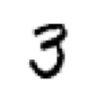

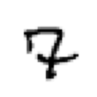

In [54]:
show_image(img3)
show_image(seven_tensor[2])


**we have combined all tensors into a single tensor . this new tensor is 28*28.**

In [55]:
stacked_seven=torch.stack(seven_tensor).float()/255
stacked_three=torch.stack(three_tensor).float()/255
stacked_seven.shape, stacked_three.shape


(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

In [56]:
len(stacked_three), len(stacked_seven.shape)

(6131, 3)

**burda 6131 tane goruntu var ve her goruntu 28*28 lık pıkselden olusuyormus**

In [57]:
stacked_three.ndim, stacked_three.shape

(3, torch.Size([6131, 28, 28]))

**Bu bize lıstelenmıs tum 7 ler ya da 3 lerın ortalamasını verır yanı genel olarak neye benzedıklerının ortalaması dıyebılırız.**

<Axes: >

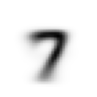

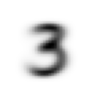

In [58]:
mean7=stacked_seven.mean(0)
show_image(mean7)
mean3=stacked_three.mean(0)
show_image(mean3)

**şimdi herhangı bır 7 nın ortalama bır 7 ye  olan uzaklıgını olcelım.**

In [59]:
tensor7_12=stacked_seven[12]
dist_7_abs=(tensor7_12-mean3).abs().mean()
dist_7_abs

tensor(0.1671)

**asagıda tensor ve numpy array leri ile ilgili bazı ıslemler: ** **kalın metin**

In [60]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [61]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [63]:
arr[:,1]

array([2, 5])

In [64]:
tns[:,1]

tensor([2, 5])

In [65]:
tns[0]

tensor([1, 2, 3])

In [66]:
tns[1,1:3]

tensor([5, 6])

In [67]:
tns+3

tensor([[4, 5, 6],
        [7, 8, 9]])

In [68]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [69]:
a_3 = stacked_three[1]
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [70]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape, len(valid_3_tens)


(tensor([0.1159, 0.1197, 0.1068,  ..., 0.1192, 0.1147, 0.1290]),
 torch.Size([1010]),
 1010)

In [71]:
tensor([1,2,3]) + tensor([1])

tensor([2, 3, 4])

**bır sayının 3 e aıt olup olmadıgını bılmek ıcın eger mean3 e olan uzaklıgı mean7 ye olan uzaklıgından az ıse o zaman o sayı 3 tur.**

In [72]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

**FLOAT ILE YAPMAK TRUE VE FALSE I 1 VE 0 YAPAR.**

In [73]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [74]:
is_3(valid_3_tens[0:50])

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False,  True])

In [75]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s

(tensor(0.9168), tensor(0.9854))

In [76]:
xt=tensor([2.,5. ,7.]).requires_grad_()

In [77]:
def f(x): return (x**2).sum()

In [78]:
yt=f(xt)
yt.backward()

**burda x^2 turevı 2*x dır. verılen 2,5,7 degerlerını buraya koyunca bu noktada kı turev degerlerını bulduk.**

In [79]:
xt.grad

tensor([ 4., 10., 14.])

In [81]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [82]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [83]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [84]:
params = torch.randn(3).requires_grad_()

In [85]:
orig_params = params.clone()

In [86]:
preds = f(time, params)

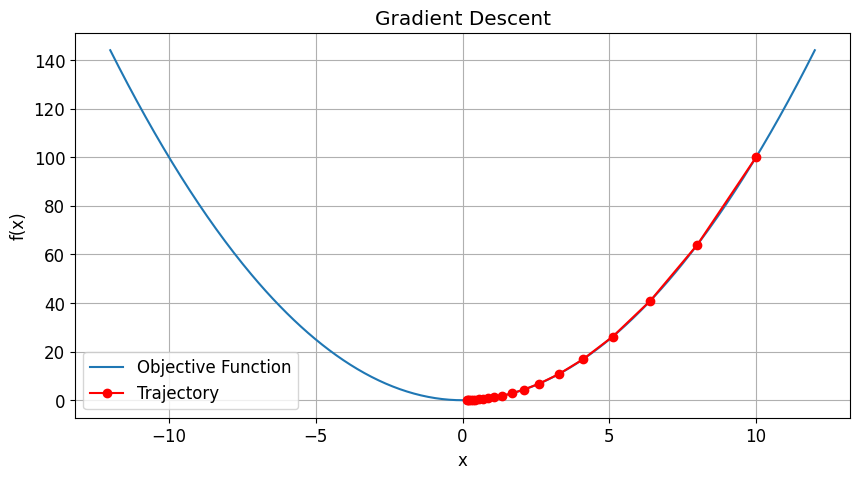

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    return x**2

# Define the gradient of the objective function
def gradient(x):
    return 2 * x

# Gradient Descent function
def gradient_descent(learning_rate, iterations):
    x = 10  # Initial guess
    history = []  # To store the history of x values for plotting

    for _ in range(iterations):
        history.append(x)
        x = x - learning_rate * gradient(x)

    return history

# Set hyperparameters
learning_rate = 0.1
iterations = 20

# Run gradient descent
trajectory = gradient_descent(learning_rate, iterations)

# Plot the objective function and the trajectory
x = np.linspace(-12, 12, 400)
y = objective_function(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Objective Function')
plt.plot(trajectory, [objective_function(x) for x in trajectory], 'ro-', label='Trajectory')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()